<a href="https://colab.research.google.com/github/KalyanMohanty/Fruit_Classification/blob/main/Fruit_Classification_Paper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras import models,layers

In [3]:
names = os.listdir("/content/drive/MyDrive/fruit dataset")
names

['fresh bananas',
 'fresh oranges',
 'rotten apples',
 'fresh apples',
 'rotten bananas',
 'rotten oranges',
 '.ipynb_checkpoints']

In [4]:
x = []
y = []

for folder in names:
  files = os.listdir("/content/drive/MyDrive/fruit dataset/"+folder)
  for file in files:
    img = image.load_img("/content/drive/MyDrive/fruit dataset/"+folder+"/"+file,target_size=(200,200))
    img = image.img_to_array(img)
    x.append(img)
    y.append(names.index(folder))


x = np.array(x)
y = np.array(y)
print(x.shape)
print(y.shape)

(849, 200, 200, 3)
(849,)


In [5]:
x = np.array(x)
y = np.array(y)
print(x.shape)
print(y.shape)


(849, 200, 200, 3)
(849,)


In [6]:
y = to_categorical(y)
print(y.shape)

(849, 6)


In [7]:
x = x/255

# CNN

In [12]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=5)

In [38]:
model = models.Sequential()
model.add(layers.Conv2D(filters=20,kernel_size=(5,5),input_shape=(200,200,3),activation = 'relu'))
model.add(layers.Conv2D(30,(5,5),activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.5))
model.add(layers.Conv2D(40,(3,3),activation='relu'))
model.add(layers.Conv2D(80,(3,3),activation='relu'))
model.add(layers.Conv2D(100,(3,3),activation='relu'))
model.add(layers.Conv2D(120,(3,3),activation='relu'))
model.add(layers.Conv2D(140,(3,3),activation='relu'))
model.add(layers.Conv2D(160,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(180,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(100,activation='relu'))
model.add(layers.Dense(6,activation='softmax'))


In [39]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [40]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255, #Scale the image between 0 and 1
 rotation_range=40,
 width_shift_range=0.2,
 height_shift_range=0.2,
 shear_range=0.2,
 zoom_range=0.2,
 horizontal_flip=True,)


In [41]:
train_datagen = ImageDataGenerator(rescale=1./255 )

In [42]:
val_datagen = ImageDataGenerator(rescale=1./255)

In [43]:
#Create the image generators
batch_size = 32
train_generator = train_datagen.flow(xtrain, ytrain, batch_size=batch_size)
val_generator = val_datagen.flow(xtest, ytest, batch_size=batch_size)


In [44]:
ntrain = len(xtrain)
nval = len(xtest)
print(ntrain)
print(nval)


679
170


In [46]:
history = model.fit_generator(train_generator,
 steps_per_epoch=ntrain // batch_size,
 epochs=20,
 validation_data=val_generator,
 validation_steps=nval // batch_size)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
21/21 [==============================] - 3s 136ms/step - loss: 1.7912 - accuracy: 0.1777 - val_loss: 1.7926 - val_accuracy: 0.1437
Epoch 2/100
21/21 [==============================] - 3s 137ms/step - loss: 1.7907 - accuracy: 0.1777 - val_loss: 1.7945 - val_accuracy: 0.1375
Epoch 3/100
21/21 [==============================] - 3s 136ms/step - loss: 1.7910 - accuracy: 0.1839 - val_loss: 1.7927 - val_accuracy: 0.1500
Epoch 4/100
21/21 [==============================] - 3s 137ms/step - loss: 1.7911 - accuracy: 0.1777 - val_loss: 1.7934 - val_accuracy: 0.1375
Epoch 5/100
21/21 [==============================] - 3s 136ms/step - loss: 1.7905 - accuracy: 0.1808 - val_loss: 1.7935 - val_accuracy: 0.1500
Epoch 6/100
21/21 [==============================] - 3s 137ms/step - loss: 1.7904 - accuracy: 0.1824 - val_loss: 1.7929 - val_accuracy: 0.1437
Epoch 7/100
21/21 [==============================] - 3s 140ms/step - loss: 1.7909 - accuracy: 0.1786 - val_loss: 1.7928 - val_accuracy: 0.1562

#Plot model Accuracy and Loss

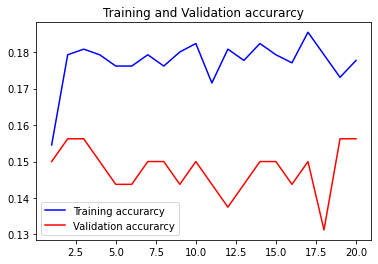

In [23]:
#get the details form the history object
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

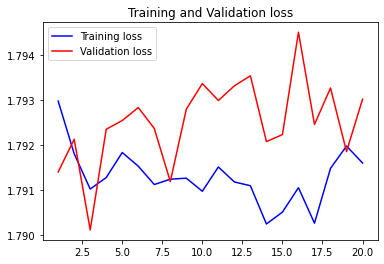

In [25]:
plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()


In [28]:
Y_pred = model.predict(xtest)
# #y_pred = np.argmax(Y_pred, axis=1) - used for multiclass
# y_pred = (Y_pred > 0.5) * 1.0
# y_pred = y_pred.reshape(ytest.shape)
print(Y_pred.shape)
# y_pred.sum()
print(Y_pred[10])
y_pred = (Y_pred > 0.5) * 1.0
y_pred = y_pred.reshape(ytest.shape)
print(y_pred)
y_pred.sum()


(170, 6)
[0.14233845 0.19939066 0.1528829  0.17774276 0.17549035 0.15215485]
[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]


0.0

# ResNet50

In [29]:
from tensorflow.keras.applications import resnet50
model2 = resnet50.ResNet50(weights='imagenet')
#new_model.summary()
input_layer = layers.Input(shape=(200,200,3))
model2 = resnet50.ResNet50(weights='imagenet',include_top=False,input_tensor=input_layer)
#model2.summary()
last_layer = model2.output
flat = layers.Flatten()(last_layer)
output_layer = layers.Dense(6,activation='softmax')(flat)
new_model = models.Model(inputs=input_layer,outputs=output_layer)
#new_model.summary()
for layer in new_model.layers[:-1]:
 layer.trainable=False
#new_model.summary()

94773248/94765736 [==============================] - 1s 0us/step


In [33]:
x = []
y = []

for folder in names:
  files = os.listdir("/content/drive/MyDrive/fruit dataset/"+folder)
  for file in files:
    img = image.load_img("/content/drive/MyDrive/fruit dataset/"+folder+"/"+file,target_size=(200,200))
    img = image.img_to_array(img)
    x.append(img)
    y.append(names.index(folder))
x = np.array(x)
y = np.array(y)
print(x.shape)
print(y.shape)
y = to_categorical(y)
print(y.shape)
x = x/255


(849, 200, 200, 3)
(849,)
(849, 6)


In [34]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=5)

In [35]:
new_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history = new_model.fit(xtrain,ytrain,batch_size=32,epochs=20,validation_data=(xtest,ytest))


Epoch 1/20
22/22 [==============================] - 7s 135ms/step - loss: 8.3178 - accuracy: 0.2166 - val_loss: 2.0481 - val_accuracy: 0.3824
Epoch 2/20
22/22 [==============================] - 2s 70ms/step - loss: 1.9331 - accuracy: 0.4326 - val_loss: 1.8188 - val_accuracy: 0.3353
Epoch 3/20
22/22 [==============================] - 1s 68ms/step - loss: 1.3681 - accuracy: 0.5379 - val_loss: 1.3335 - val_accuracy: 0.5765
Epoch 4/20
22/22 [==============================] - 2s 69ms/step - loss: 1.0137 - accuracy: 0.6420 - val_loss: 1.2597 - val_accuracy: 0.5059
Epoch 5/20
22/22 [==============================] - 2s 69ms/step - loss: 0.9876 - accuracy: 0.6256 - val_loss: 2.1134 - val_accuracy: 0.4882
Epoch 6/20
22/22 [==============================] - 2s 69ms/step - loss: 1.5727 - accuracy: 0.5428 - val_loss: 2.1971 - val_accuracy: 0.5765
Epoch 7/20
22/22 [==============================] - 2s 70ms/step - loss: 1.4394 - accuracy: 0.6468 - val_loss: 1.1426 - val_accuracy: 0.6059
Epoch 8/20
2

#Plotting Model Accuracy and loss graph

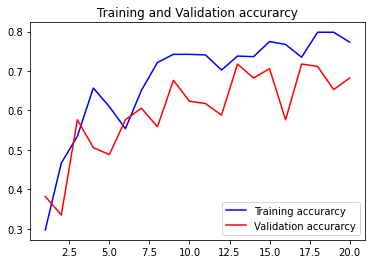

In [36]:
#get the details form the history object
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

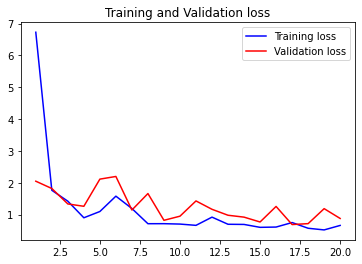

In [37]:
plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

# VGG16

In [54]:
from keras.applications.vgg16 import VGG16
model3 = VGG16(weights='imagenet')

In [55]:
print(model3.summary())

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [50]:
from keras.utils.vis_utils import plot_model

In [60]:
#plot_model(model3, to_file='vgg.png')

In [56]:
input_layer = layers.Input(shape=(200,200,3))

In [58]:
model3 = VGG16(weights='imagenet',include_top=False,input_tensor=input_layer)

In [59]:
print(model3.summary())

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 200, 200, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 200, 200, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 200, 200, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 100, 100, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 100, 100, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 100, 100, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 50, 50, 128)       0     

In [61]:

last_layer = model3.output

flat = layers.Flatten()(last_layer)
output_layer = layers.Dense(6,activation='softmax')(flat)

new_model = models.Model(inputs=input_layer,outputs=output_layer)
for layer in new_model.layers[:-1]:
  layer.trainable=False

In [63]:
new_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 200, 200, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 200, 200, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 200, 200, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 100, 100, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 100, 100, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 100, 100, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 50, 50, 128)       0   

In [64]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=5)

In [65]:
new_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history = new_model.fit(xtrain,ytrain,batch_size=32,epochs=20,validation_data=(xtest,ytest))


Epoch 1/20
22/22 [==============================] - 6s 159ms/step - loss: 1.4685 - accuracy: 0.5077 - val_loss: 0.3850 - val_accuracy: 0.8529
Epoch 2/20
22/22 [==============================] - 2s 73ms/step - loss: 0.2129 - accuracy: 0.9176 - val_loss: 0.2527 - val_accuracy: 0.8882
Epoch 3/20
22/22 [==============================] - 2s 72ms/step - loss: 0.0688 - accuracy: 0.9868 - val_loss: 0.2103 - val_accuracy: 0.9176
Epoch 4/20
22/22 [==============================] - 2s 73ms/step - loss: 0.0622 - accuracy: 0.9910 - val_loss: 0.1919 - val_accuracy: 0.9294
Epoch 5/20
22/22 [==============================] - 2s 72ms/step - loss: 0.0355 - accuracy: 0.9986 - val_loss: 0.1965 - val_accuracy: 0.9235
Epoch 6/20
22/22 [==============================] - 2s 74ms/step - loss: 0.0262 - accuracy: 0.9993 - val_loss: 0.2015 - val_accuracy: 0.9294
Epoch 7/20
22/22 [==============================] - 2s 73ms/step - loss: 0.0217 - accuracy: 1.0000 - val_loss: 0.1775 - val_accuracy: 0.9294
Epoch 8/20
2

# Plotting Model Accuracy and Loss

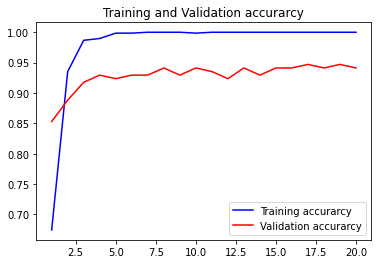

In [66]:
#get the details form the history object
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

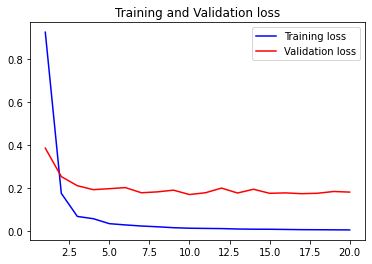

In [67]:
plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

#VGG 19


In [78]:
from keras.applications.vgg19 import VGG19
model4 = VGG19(weights='imagenet')

In [79]:
#print(model3.summary())

In [80]:
input_layer = layers.Input(shape=(200,200,3))
model4 = VGG19(weights='imagenet',include_top=False,input_tensor=input_layer)


In [81]:
#print(model3.summary())

In [82]:

last_layer = model4.output

flat = layers.Flatten()(last_layer)
output_layer = layers.Dense(6,activation='softmax')(flat)

new_model = models.Model(inputs=input_layer,outputs=output_layer)
for layer in new_model.layers[:-1]:
  layer.trainable=False

In [83]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=5)
new_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history = new_model.fit(xtrain,ytrain,batch_size=32,epochs=20,validation_data=(xtest,ytest))


Epoch 1/20
22/22 [==============================] - 3s 100ms/step - loss: 1.6242 - accuracy: 0.5223 - val_loss: 0.3294 - val_accuracy: 0.8882
Epoch 2/20
22/22 [==============================] - 2s 88ms/step - loss: 0.1653 - accuracy: 0.9592 - val_loss: 0.2623 - val_accuracy: 0.9118
Epoch 3/20
22/22 [==============================] - 2s 87ms/step - loss: 0.1197 - accuracy: 0.9691 - val_loss: 0.3186 - val_accuracy: 0.8882
Epoch 4/20
22/22 [==============================] - 2s 87ms/step - loss: 0.0711 - accuracy: 0.9845 - val_loss: 0.1925 - val_accuracy: 0.9235
Epoch 5/20
22/22 [==============================] - 2s 87ms/step - loss: 0.0465 - accuracy: 0.9932 - val_loss: 0.2563 - val_accuracy: 0.8824
Epoch 6/20
22/22 [==============================] - 2s 86ms/step - loss: 0.0375 - accuracy: 0.9991 - val_loss: 0.2322 - val_accuracy: 0.8941
Epoch 7/20
22/22 [==============================] - 2s 87ms/step - loss: 0.0338 - accuracy: 0.9970 - val_loss: 0.2191 - val_accuracy: 0.9118
Epoch 8/20
2

#Plotting Model Accuracy and Loss

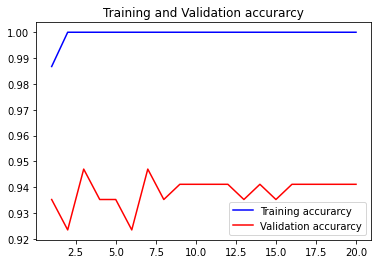

In [75]:
#get the details form the history object
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

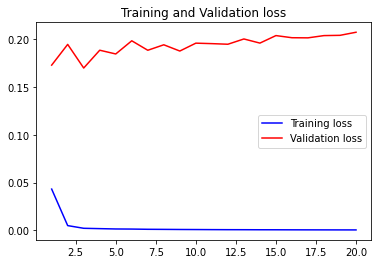

In [76]:
plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

#InceptionResNetV2

In [84]:
import tensorflow as tf

In [93]:
input_layer = layers.Input(shape=(200,200,3))
model5 = tf.keras.applications.InceptionResNetV2(weights='imagenet',
    include_top=False,input_tensor=input_layer)

219062272/219055592 [==============================] - 2s 0us/step


In [89]:
#model5.summary()

In [94]:

last_layer = model5.output

flat = layers.Flatten()(last_layer)
output_layer = layers.Dense(6,activation='softmax')(flat)

new_model = models.Model(inputs=input_layer,outputs=output_layer)
for layer in new_model.layers[:-1]:
  layer.trainable=False
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=5)
new_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history = new_model.fit(xtrain,ytrain,batch_size=32,epochs=20,validation_data=(xtest,ytest))


Epoch 1/20
22/22 [==============================] - 19s 320ms/step - loss: 3.4131 - accuracy: 0.5700 - val_loss: 0.6967 - val_accuracy: 0.8824
Epoch 2/20
22/22 [==============================] - 3s 116ms/step - loss: 0.6119 - accuracy: 0.9054 - val_loss: 0.4700 - val_accuracy: 0.9294
Epoch 3/20
22/22 [==============================] - 3s 116ms/step - loss: 0.0843 - accuracy: 0.9839 - val_loss: 0.4704 - val_accuracy: 0.9176
Epoch 4/20
22/22 [==============================] - 3s 115ms/step - loss: 0.0848 - accuracy: 0.9817 - val_loss: 0.2229 - val_accuracy: 0.9588
Epoch 5/20
22/22 [==============================] - 2s 115ms/step - loss: 0.0088 - accuracy: 0.9980 - val_loss: 0.2569 - val_accuracy: 0.9353
Epoch 6/20
22/22 [==============================] - 3s 116ms/step - loss: 0.0239 - accuracy: 0.9849 - val_loss: 0.3423 - val_accuracy: 0.9353
Epoch 7/20
22/22 [==============================] - 3s 115ms/step - loss: 0.0134 - accuracy: 0.9970 - val_loss: 0.3103 - val_accuracy: 0.9294
Epoch

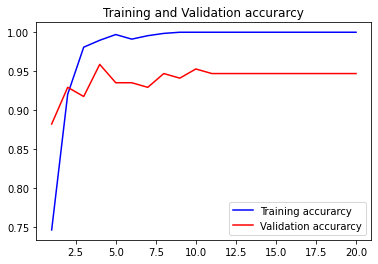

In [95]:
#get the details form the history object
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

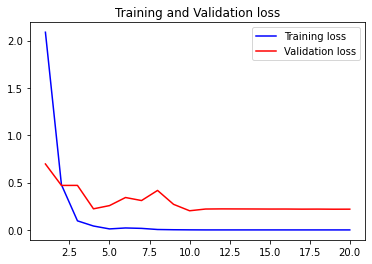

In [96]:
plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()